In [29]:
%reload_ext autoreload
%autoreload 2

[autoreload of nwb_datajoint.common.common_ephys failed: Traceback (most recent call last):
  File "/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 329, in update_class
    if update_generic(old_obj, new_obj):
  File "/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/home/edeno/miniconda3/envs/nwb_datajoint/lib/python

In [30]:
from replay_trajectory_classification import ClusterlessClassifier
from nwb_datajoint.common import IntervalList
from nwb_datajoint.decoding.clusterless import UnitMarksIndicatorSelection, UnitMarksIndicator, UnitMarks, _restore_classes, ClusterlessClassifierParameters
from nwb_datajoint.decoding.core import _restore_classes
from nwb_datajoint.common.common_position import IntervalPositionInfo, IntervalPositionInfoSelection, IntervalLinearizedPosition
from nwb_datajoint.common.nwb_helper_fn import get_nwb_copy_filename

ImportError: cannot import name '_restore_classes' from 'nwb_datajoint.decoding.clusterless' (/stelmo/edeno/nwb_datajoint/src/nwb_datajoint/decoding/clusterless.py)

In [ ]:
import nwb_datajoint as nd

nwb_file_name = 'CH6520211201.nwb'

nwb_copy_file_name = get_nwb_copy_filename(nwb_file_name)

In [ ]:
import pandas as pd


pd.DataFrame((UnitMarks() & {'nwb_file_name': nwb_copy_file_name}))

In [ ]:
selection = ((UnitMarks() &
  {'nwb_file_name': nwb_copy_file_name, 'sort_interval_name': 'CH65_run'})
 * 
  (nd.common.IntervalList() &
   {'nwb_file_name': nwb_copy_file_name, 'interval_list_name': 'pos 0 valid times'})
  )

UnitMarksIndicatorSelection.insert(selection, ignore_extra_fields=True, skip_duplicates=True)

UnitMarksIndicator.populate()

In [ ]:
from replay_trajectory_classification.environments import Environment
from replay_trajectory_classification.continuous_state_transitions import RandomWalk, Uniform
from nwb_datajoint.common.common_position import TrackGraph
from nwb_datajoint.decoding.clusterless import _convert_transitions_to_dict

parameters = (ClusterlessClassifierParameters() & {'classifier_param_name': 'default_decoding_gpu'}).fetch1()

track_graph = (TrackGraph & {'track_graph_name': 'weill auto track 6 arm 4'}).get_networkx_track_graph()
track_graph_params = (TrackGraph & {'track_graph_name': 'weill auto track 6 arm 4'}).fetch1()

parameters['classifier_params']['environments'] = [
    vars(Environment(
    track_graph=track_graph_params['track_graph_name'],
    edge_order=track_graph_params['linear_edge_order'],
    edge_spacing=track_graph_params['linear_edge_spacing']))]

ClusterlessClassifierParameters.insert1(
    {'classifier_param_name': 'weill auto track 6 arm 4',
     'classifier_params': parameters['classifier_params'],
     'fit_params': parameters['fit_params'],
     'predict_params': parameters['predict_params']},
    skip_duplicates=True)

In [ ]:
key = dict(
    nwb_file_name=get_nwb_copy_filename(nwb_file_name),
    # Position
    interval_list_name='pos 0 valid times',
    position_info_param_name='default_decoding',
    # Marks
    sort_interval_name='CH65_run',
    filter_parameter_set_name='franklab_default_hippocampus',
    unit_inclusion_param_name='all',
    mark_param_name='default',
    sampling_rate=500.0,
    # 
    raw_epoch_interval=1,
    # Classifier
    classifier_param_name='weill auto track 6 arm 4',
)


position_info = (IntervalPositionInfo() &
                 {'nwb_file_name': key['nwb_file_name'],
                  'interval_list_name': key['interval_list_name'],
                  'position_info_param_name': key['position_info_param_name'],
                 }
                ).fetch1_dataframe()

linear_position_df = (IntervalLinearizedPosition() &
 {'nwb_file_name': key['nwb_file_name'],
  'interval_list_name': key['interval_list_name'],
  'position_info_param_name': key['position_info_param_name'],
 }
).fetch1_dataframe()


marks = (UnitMarksIndicator & {
    'nwb_file_name': key['nwb_file_name'],
    'sort_interval_name': key['sort_interval_name'],
    'filter_parameter_set_name': key['filter_parameter_set_name'],
    'unit_inclusion_param_name': key['unit_inclusion_param_name'],
    'mark_param_name': key['mark_param_name'],
    'interval_list_name': key['interval_list_name'],
    'sampling_rate': key['sampling_rate'],
}).fetch_xarray()

In [3]:
linear_position_df.shape

NameError: name 'linear_position_df' is not defined

In [9]:
position_info.shape

(4070488, 6)

In [10]:
marks

<xarray.DataArray (time: 4070488, marks: 4, electrodes: 32)>
array([[[  nan,   nan,   nan, ...,   nan,   nan, -214.],
        [  nan,   nan,   nan, ...,   nan,   nan, -133.],
        [  nan,   nan,   nan, ...,   nan,   nan, -132.],
        [  nan,   nan,   nan, ...,   nan,   nan, -533.]],

       [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       ...,

       [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]]])
Coordinates:
  * marks    (marks) <U11 'amplitude_0' 'amplitude_1' ... 'amplitude_3'
  * time     (time) float64 1.638e+09 1.638e+09 ... 1.638e+09 1.638e+09
Dimensions without coordinates: electrodes

In [11]:
from replay_trajectory_classification import ClusterlessClassifier
from nwb_datajoint.common import IntervalList
from nwb_datajoint.decoding.clusterless import UnitMarksIndicatorSelection, UnitMarksIndicator, UnitMarks, _restore_classes, ClassifierParameters
from nwb_datajoint.common.common_position import IntervalPositionInfo, IntervalPositionInfoSelection, IntervalLinearizedPosition
from nwb_datajoint.common.nwb_helper_fn import get_nwb_copy_filename

# Exclude times without valid neural data
raw_valid_times = (IntervalList() &
                   {'nwb_file_name': key['nwb_file_name'],
                    'interval_list_name': 'raw data valid times'}
                   ).fetch1('valid_times')[0]

start_time, end_time = raw_valid_times
valid_time_slice = slice(start_time, end_time)

In [12]:
from scipy.ndimage.filters import gaussian_filter1d
import numpy as np
import pandas as pd

def gaussian_smooth(data, sigma, sampling_frequency, axis=0, truncate=8):
    '''1D convolution of the data with a Gaussian.
    The standard deviation of the gaussian is in the units of the sampling
    frequency. The function is just a wrapper around scipy's
    `gaussian_filter1d`, The support is truncated at 8 by default, instead
    of 4 in `gaussian_filter1d`
    Parameters
    ----------
    data : array_like
    sigma : float
    sampling_frequency : int
    axis : int, optional
    truncate : int, optional
    Returns
    -------
    smoothed_data : array_like
    '''
    return gaussian_filter1d(
        data, sigma * sampling_frequency, truncate=truncate, axis=axis,
        mode='constant')


def get_multiunit_population_firing_rate(multiunit, sampling_frequency,
                                         smoothing_sigma=0.015):
    '''Calculates the multiunit population firing rate.
    Parameters
    ----------
    multiunit : ndarray, shape (n_time, n_signals)
        Binary array of multiunit spike times.
    sampling_frequency : float
        Number of samples per second.
    smoothing_sigma : float or np.timedelta
        Amount to smooth the firing rate over time. The default is
        given assuming time is in units of seconds.
    Returns
    -------
    multiunit_population_firing_rate : ndarray, shape (n_time,)
    '''
    return gaussian_smooth(multiunit.mean(axis=1) * sampling_frequency,
                           smoothing_sigma, sampling_frequency)


SAMPLING_FREQUENCY = 500
multiunit_spikes = (np.any(~np.isnan(marks.values), axis=1)
                    ).astype(float)
multiunit_firing_rate = pd.DataFrame(
    get_multiunit_population_firing_rate(
        multiunit_spikes, SAMPLING_FREQUENCY), index=position_info.index,
    columns=['firing_rate'])

In [13]:
from ripple_detection import multiunit_HSE_detector

multiunit_high_synchrony_times = multiunit_HSE_detector(
    marks.time.values,
    multiunit_spikes,
    position_info.head_speed.values,
    sampling_frequency=SAMPLING_FREQUENCY,
    minimum_duration=0.015,
    zscore_threshold=2.0,
    close_event_threshold=0.000)

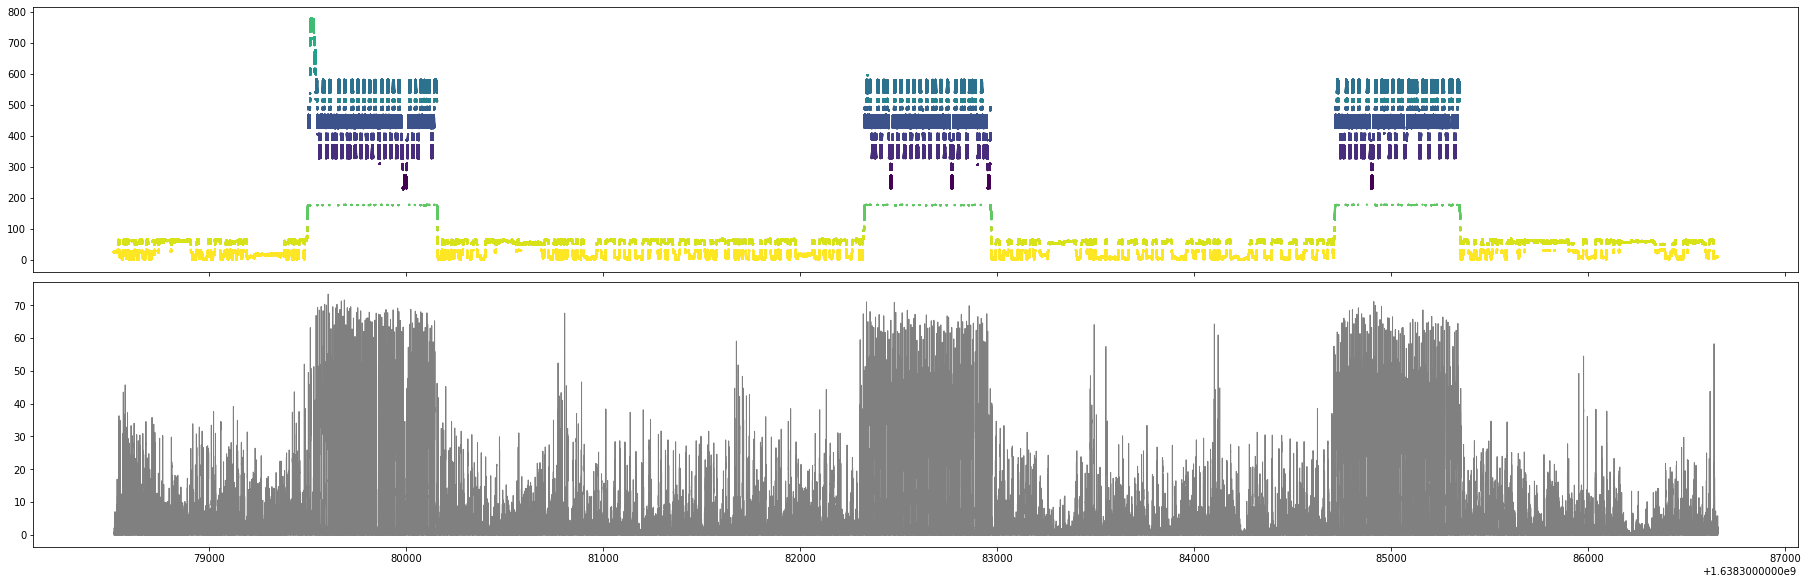

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(25, 8), sharex=True, constrained_layout=True)
axes[0].scatter(linear_position_df.index, linear_position_df.linear_position, c=linear_position_df.track_segment_id, s=1)
axes[1].fill_between(position_info.index, position_info.head_speed, color='grey')

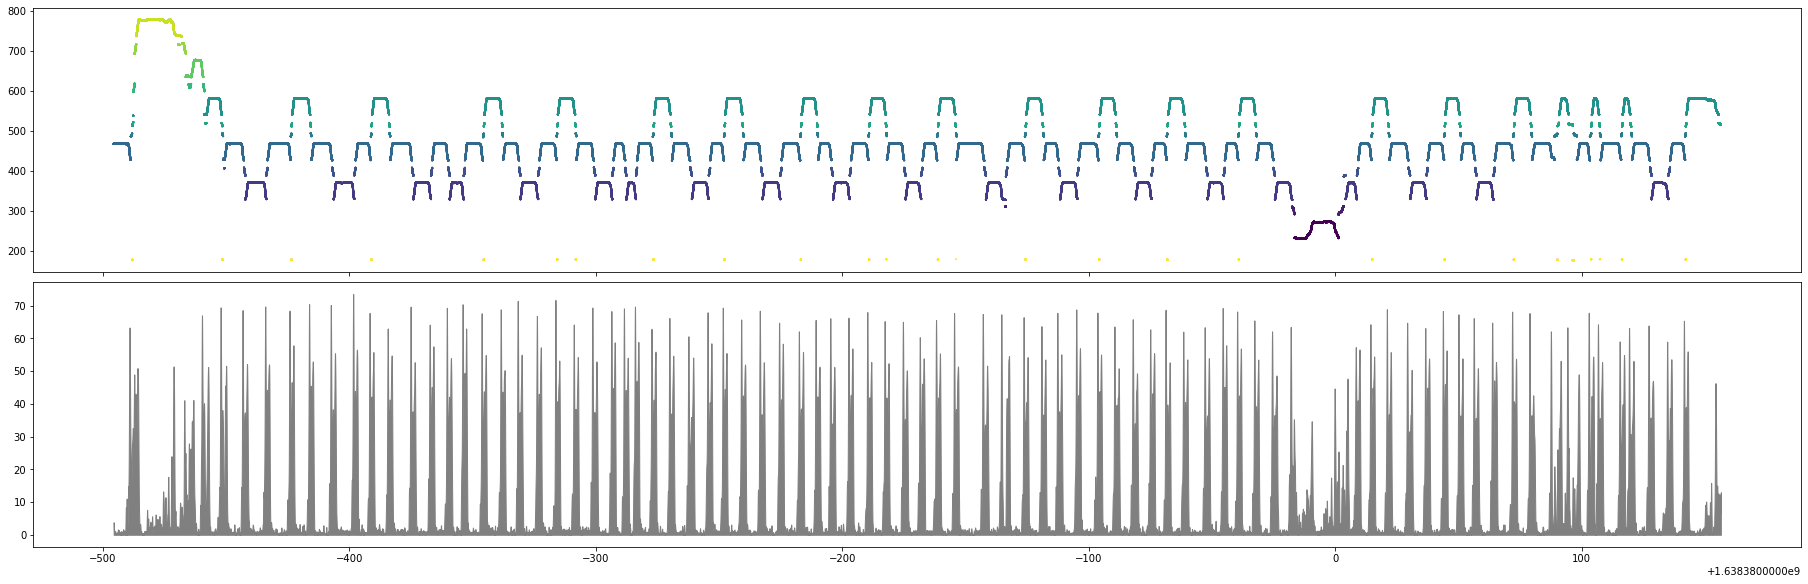

In [15]:
import matplotlib.pyplot as plt

time_slice = slice(495_000, 821_000)
fig, axes = plt.subplots(2, 1, figsize=(25, 8), sharex=True, constrained_layout=True)
axes[0].scatter(linear_position_df.index[time_slice], linear_position_df.linear_position.values[time_slice], c=linear_position_df.track_segment_id.values[time_slice], s=1)
axes[1].fill_between(position_info.index[time_slice], position_info.head_speed.values[time_slice], color='grey')

In [16]:
import pprint

linear_position_df = linear_position_df.loc[valid_time_slice]
marks = marks.sel(time=valid_time_slice)
position_info = position_info.loc[valid_time_slice]

parameters = (ClassifierParameters() & {'classifier_param_name': key['classifier_param_name']}).fetch1()
parameters = _restore_classes(parameters)

pprint.pprint(parameters)

{'classifier_param_name': 'weill auto track 6 arm 4',
 'classifier_params': {'clusterless_algorithm': 'multiunit_likelihood_gpu',
                       'clusterless_algorithm_params': {'mark_std': 20.0,
                                                        'position_std': 6.0},
                       'continuous_transition_types': [[RandomWalk(environment_name='', movement_var=6.0, movement_mean=0.0),
                                                        Uniform(environment_name='', environment2_name=None)],
                                                       [Uniform(environment_name='', environment2_name=None),
                                                        Uniform(environment_name='', environment2_name=None)]],
                       'discrete_transition_type': DiagonalDiscrete(diagonal_value=0.98),
                       'environments': [Environment(environment_name='', place_bin_size=2.0, track_graph=<networkx.classes.graph.Graph object at 0x7f41b01f0a00>, edge_or

In [17]:
classifier = ClusterlessClassifier(**parameters['classifier_params'])
classifier.fit(
    is_training=position_info.head_speed.values > 4,
    position=linear_position_df.linear_position.values,
    multiunits=marks.values,
    **parameters['fit_params']
)

/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/replay_trajectory_classification/bins.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_segment_id[is_nan] = 0  # need to check
/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/replay_trajectory_classification/bins.py:352: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  is_track_interior = np.ones_like(place_bin_centers, dtype=np.bool)
/home/edeno/miniconda3/envs/nwb_datajoint/lib/pytho

ClusterlessClassifier(clusterless_algorithm='multiunit_likelihood_gpu',
                      clusterless_algorithm_params={'mark_std': 20.0,
                                                    'position_std': 6.0},
                      continuous_transition_types=[[RandomWalk(environment_name='', movement_var=6.0, movement_mean=0.0),
                                                    Uniform(environment_name='', environment2_name=None)],
                                                   [Uniform(environment_name='', environment2_name=None),
                                                    Uniform(en...
                      environments=[Environment(environment_name='', place_bin_size=2.0, track_graph=<networkx.classes.graph.Graph object at 0x7f41b01f0a00>, edge_order=[(17, 16), (16, 15), (15, 13), (13, 12), (14, 13), (1, 0), (1, 3), (3, 2), (3, 5), (5, 4), (5, 12), (12, 7), (7, 6), (7, 9), (9, 8), (9, 11), (11, 10)], edge_spacing=15, is_track_interior=None, position_range=None,

In [18]:
import matplotlib.pyplot as plt
import copy


def plot_hse(time_slice, results, classifier, linear_position_df, position_info, multiunit_firing_rate):
    cmap = 'bone_r'
    cmap = copy.copy(plt.cm.get_cmap(cmap))
    cmap.set_bad(color="lightgrey", alpha=1.0)

    fig, axes = plt.subplots(4, 1, sharex=True, constrained_layout=True, figsize=(9, 7), gridspec_kw={'height_ratios': [1, 1, 3, 1]}, dpi=100)

    # ax 0
    axes[0].fill_between(results.time, multiunit_firing_rate.loc[time_slice].squeeze(), color='black')
    axes[0].set_ylabel('Multiunit\nRate\n[spikes / s]')

    # ax 1
    axes[1].plot(results.time, results.acausal_posterior.sum('position').values)
    axes[1].set_ylabel('Prob.')

    # ax 2
    results.acausal_posterior.sum('state').where(classifier.environments[0].is_track_interior_).plot(
        x='time', y='position', ax=axes[2], cmap=cmap, vmin=0.0, vmax=0.2)
    axes[2].scatter(results.time, linear_position_df.loc[time_slice].linear_position, s=5, color='magenta', zorder=10)
    axes[2].set_ylabel('Position [cm]')
    axes[2].set_xlabel('')

    # ax 3
    axes[3].fill_between(results.time, position_info.loc[time_slice].head_speed, color='grey')
    axes[3].set_ylabel('Speed\n[cm / s]')

    axes[-1].set_xlabel('Time [s]')

In [19]:
ripple_times = np.load('ch65_12_01_ripples_v2.pkl', allow_pickle=True)
ripple_times

,start_time,end_time
ripple_number,,
1,1.638379e+09,1.638379e+09
2,1.638379e+09,1.638379e+09
3,1.638379e+09,1.638379e+09
4,1.638379e+09,1.638379e+09
5,1.638379e+09,1.638379e+09
...,...,...
1559,1.638387e+09,1.638387e+09
1560,1.638387e+09,1.638387e+09
1561,1.638387e+09,1.638387e+09


In [ ]:
from tqdm.autonotebook import tqdm
import xarray as xr

results = [
    classifier.predict(multiunits=marks.sel(time=slice(df.start_time, df.end_time)),
                             time=marks.sel(time=slice(df.start_time, df.end_time)).time - df.start_time,
                             **parameters['predict_params'])
    for _, df in tqdm(ripple_times.iterrows(), total=len(ripple_times), desc='ripples')]



results = xr.concat(results, dim=ripple_times.index)
results

In [ ]:
results.to_netcdf('ch65_12_01_ripples_results.nc')

In [ ]:
for ripple_number, df in ripple_times.iterrows():
    plot_hse(slice(df.start_time, df.end_time), results.sel(ripple_number=ripple_number).dropna('time', how='all'), classifier, linear_position_df, position_info, multiunit_firing_rate)
    plt.savefig(f'CH65/ripple_{ripple_number:02d}.png')
    plt.close()

In [44]:
from trajectory_analysis_tools import (get_ahead_behind_distance,
                                       get_trajectory_data,
                                       maximum_a_posteriori_estimate)


def get_stats(results, ripple_number, pos_info):
    posterior = results.sel(ripple_number=ripple_number).dropna('time', how='all').acausal_posterior.sum("state")
    prob = results.sel(ripple_number=ripple_number).dropna('time', how='all').acausal_posterior.sum("position")

    trajectory_data = get_trajectory_data(
        posterior,
        track_graph,
        classifier,
        pos_info)

    ahead_behind_distance = get_ahead_behind_distance(
        track_graph, *trajectory_data)

    is_cont = prob.sel(state='Continuous') > 0.8
    is_frag = prob.sel(state='Uniform') > 0.8
    
    avg_cont_replay_dist = np.abs(ahead_behind_distance[is_cont]).mean()
    cont_dist_travelled = np.sum(np.abs(np.diff(np.abs(ahead_behind_distance[is_cont]))))
    
    cont_duration = is_cont.sum() * 0.002
    frag_duration = is_frag.sum() * 0.002
    
    return float(cont_duration), float(frag_duration), float(avg_cont_replay_dist), float(cont_dist_travelled)

In [45]:
pos_info = linear_position_df.copy()
pos_info['head_direction'] = position_info['head_orientation']

stats = [get_stats(results, ripple_number, pos_info) for ripple_number in ripple_times.index]
stats = pd.DataFrame(
    stats,
    columns=['continuous_duration', 'framented_duration', 'avg_continuous_replay_distance', 'cont_distance_travelled'])
stats.to_csv('CH65/CH65_ripple_decode_stats.csv')
stats

/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion

,continuous_duration,framented_duration,avg_continuous_replay_distance,cont_distance_travelled
0,0.180,0.00,20.884017,12.185499
1,0.160,0.00,160.450605,16.174627
2,0.194,0.00,2.845978,41.591294
3,0.078,0.02,8.419353,29.983255
4,0.194,0.00,161.035866,12.208543
...,...,...,...,...
1558,0.196,0.00,20.511106,4.210714
1559,0.230,0.00,20.137394,12.198958
1560,0.106,0.00,161.130654,8.040667
1561,0.320,0.00,20.475712,20.234159


In [28]:
pd.concat((position_info, linear_position_df), axis=1).to_csv('CH65/position_info_CH65.csv')